
### Victor Miranda


# Project 1

##  Objective, Method of Analysis, and Explanation of Dataset 

Our team wants to focus on credit card fraud and a way to detect it through using different big data analysis methods.

**Significance:** By 2020, card fraud worldwide is expected to mushroom to a total of 31.67 billion dollars, which would represent a rise of 45 percent from last year's figure(forbes.com). 

- It is important that credit card companies and banks are skilled to recognize fraudulent transactions. Your credit card and financial information is integral to your identity, so having it stolen from you means that it is identity theft. 

- In 2019, credit card fraud was the leading type of identity theft.

**Our Objective/Goal:** To create a model that can be used for fraud detection with the highest possible accuracy score in order to prevent fraud and or identity theft.

**Method of analysis:** 
- Classification

**Explanation of Dataset:** The dataset contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

We identify our dependent variable as “Class” which tells us if the transaction is fraudulent or not.

## Preprocessing

In [48]:
credit_card = (
spark
.read
.csv(
's3://testcis4567/Spark/creditcard_dataset_Vanessa_lopez_and_Victor_Miranda.csv'
, header=True
, inferSchema=True)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
credit_card.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|                V3|                 V4|                 V5|                 V6|                  V7|                 V8|                V9|                V10|               V11|               V12|                V13|                V14|                V15|                V16|                 V17|                V18|                V19|                V20|                 V

In [50]:
credit_card.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Time: decimal(10,0) (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double

In [51]:
# take the first five observations
credit_card.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(Time=Decimal('0'), V1=-1.3598071336738, V2=-0.0727811733098497, V3=2.53634673796914, V4=1.37815522427443, V5=-0.338320769942518, V6=0.462387777762292, V7=0.239598554061257, V8=0.0986979012610507, V9=0.363786969611213, V10=0.0907941719789316, V11=-0.551599533260813, V12=-0.617800855762348, V13=-0.991389847235408, V14=-0.311169353699879, V15=1.46817697209427, V16=-0.470400525259478, V17=0.207971241929242, V18=0.0257905801985591, V19=0.403992960255733, V20=0.251412098239705, V21=-0.018306777944153, V22=0.277837575558899, V23=-0.110473910188767, V24=0.0669280749146731, V25=0.128539358273528, V26=-0.189114843888824, V27=0.133558376740387, V28=-0.0210530534538215, Amount=149.62, Class=0), Row(Time=Decimal('0'), V1=1.19185711131486, V2=0.26615071205963, V3=0.16648011335321, V4=0.448154078460911, V5=0.0600176492822243, V6=-0.0823608088155687, V7=-0.0788029833323113, V8=0.0851016549148104, V9=-0.255425128109186, V10=-0.166974414004614, V11=1.61272666105479, V12=1.06523531137287, V13=0.4890

In [52]:
credit_card.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

284807

When we enter the code to get a count of records within the dataframe we get an output of **284,807**. 

## Handling Duplicates

In [53]:
# do we have any rows that are duplicated?
credit_card.count(), credit_card.distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(284807, 283726)

We see that 1,081 records are duplicates. With the code below we are able to see what rows are duplicated.

In [54]:
# what row is duplicated?
(
     credit_card
    .groupby(credit_card.columns)
    .count()
    .filter('count > 1')
    .show()
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+------------------+-------------------+------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+------------------+--------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+-------------------+-------------------+------+-----+-----+
|  Time|                V1|                 V2|                V3|                V4|                 V5|                  V6|                 V7|                 V8|                  V9|                V10|               V11|                V12|               V13|                V14|               V15|                V16|               V17|                V18|               V19|                 V20|               V21

We have 1,081 rows of duplicate records, however due to the nature of the dataset we have concluded that duplicates are acceptable. For example the duplicate Time is a result of transaction time from the first to the current transaction, therfore duplicate Time is not an issue. Duplicate of features V1, V2, … V28 are to be expected due to the principal components obtained with PCA. Lastly duplicates of amount and class are also acceptable for this dataset. Here we are not concerned about the 1,081 rows of duplicate records for credit card transactions. 

## Missing observations, null values

We have no null values in the dataset

In [55]:
### Get count of both null and missing values in pyspark
from pyspark.sql.functions import isnan, when, count, col

credit_card.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in credit_card.columns]).show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|Time| V1| V2| V3| V4| V5| V6| V7| V8| V9|V10|V11|V12|V13|V14|V15|V16|V17|V18|V19|V20|V21|V22|V23|V24|V25|V26|V27|V28|Amount|Class|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|     0|    0|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+

The results of runing the code to find both null and missing values within the entire dataset has returned **None** for all 31 columns. We see that a **0** is returned in the output for columns 1-31, therefore, we do not have to deal with missing values. 

### Drop Time column

We will drop the Time column because this column will not provide useful insight into whether a credit card transaction is fraudulent or not. 

In [56]:
credit_card1 = credit_card.drop(credit_card.Time)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

##  Descriptive Statistics

We can look at the entire dataframe summary of descriptive statistics, however, the output is not very organized and is hard to read. Below is the output for the entire dataframe. 

In [57]:
## summary statistics or descriptive statistics of dataframe
credit_card1.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+
|summary|                  V1|                  V2|                  V3|                  V4|                  V5|                  V6|                  V7|                  V8|                  V9|                 V10|                 V11|                 V12|                 V13|                 V14|                 V15|                 V16|                 

Due to the difficulty of reading the above output we have seperated each column individually, or by groups of three for a more simple analysis of the descriptive summary statistics for each column in the credit_card1 dataframe.

In [58]:
## summary statistics of a single column (numeric column)
credit_card1.select('Amount').describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|            Amount|
+-------+------------------+
|  count|            284807|
|   mean| 88.34961925093698|
| stddev|250.12010924018838|
|    min|               0.0|
|    max|          25691.16|
+-------+------------------+

We look at the summary statistics of the column "Amount". 
- We have a count of 284,807. 
- Our mean is 88.35, this is the average amount of dollar for our credit card transactions. 
- Standard deviation is a mathematical tool to help us assess how far the values are spread above and below the mean. A high standard deviation shows that the data is widely spread (less reliable) and a low standard deviation shows that the data are clustered closely around the mean (more reliable). Our standard deviation for "Amount" is high at 250.12 meaning this column will be less reliable for our analysis.
- Our minimum transaction "Amount" is zero
- Our max transaction amount is 25,691.16 dollars

***Now lets take a look at the summary statistics of each of the features V1, V2, … V28, the principal components obtained with PCA.***

In [59]:
## summary statistics of three columns (numeric column)
credit_card1.describe('V1', 'V2', 'V3').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+--------------------+
|summary|                  V1|                  V2|                  V3|
+-------+--------------------+--------------------+--------------------+
|  count|              284807|              284807|              284807|
|   mean|9.580116027059675...|-4.15138361172585...|-1.29012229164403...|
| stddev|  1.9586958038574889|  1.6513085794769968|  1.5162550051777701|
|    min|    -56.407509631329|   -72.7157275629303|   -48.3255893623954|
|    max|    2.45492999121121|    22.0577289904909|    9.38255843282114|
+-------+--------------------+--------------------+--------------------+

In [60]:
## summary statistics of three columns (numeric column)
credit_card1.describe('V4', 'V5', 'V6').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+--------------------+
|summary|                  V4|                  V5|                  V6|
+-------+--------------------+--------------------+--------------------+
|  count|              284807|              284807|              284807|
|   mean|1.504078216248369...|9.069176505616492...|1.405083683968752...|
| stddev|  1.4158685749409217|  1.3802467340314388|   1.332271089757576|
|    min|   -5.68317119816995|   -113.743306711146|   -26.1605059358433|
|    max|    16.8753440335975|    34.8016658766686|    73.3016255459646|
+-------+--------------------+--------------------+--------------------+

In [61]:
## summary statistics of three columns (numeric column)
credit_card1.describe('V7', 'V8', 'V9').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+--------------------+
|summary|                  V7|                  V8|                  V9|
+-------+--------------------+--------------------+--------------------+
|  count|              284807|              284807|              284807|
|   mean|-2.65049876748651...|1.528826849318273...|-2.29264151672571...|
| stddev|  1.2370935981826654|  1.1943529026692028|    1.09863208922432|
|    min|   -43.5572415712451|   -73.2167184552674|   -13.4340663182301|
|    max|    120.589493945238|    20.0072083651213|    15.5949946071278|
+-------+--------------------+--------------------+--------------------+

In [62]:
## summary statistics of three columns (numeric column)
credit_card1.describe('V10', 'V11', 'V12').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+--------------------+
|summary|                 V10|                 V11|                 V12|
+-------+--------------------+--------------------+--------------------+
|  count|              284807|              284807|              284807|
|   mean|2.176532506335261...|1.813835301123298...|-1.28692891963501...|
| stddev|  1.0888497654025182|  1.0207130277115588|  0.9992013895301411|
|    min|   -24.5882624372475|   -4.79747346479757|   -18.6837146333443|
|    max|    23.7451361206545|    12.0189131816199|     7.8483920756446|
+-------+--------------------+--------------------+--------------------+

In [63]:
## summary statistics of three columns (numeric column)
credit_card1.describe('V13', 'V14', 'V15').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+--------------------+
|summary|                 V13|                 V14|                 V15|
+-------+--------------------+--------------------+--------------------+
|  count|              284807|              284807|              284807|
|   mean|1.815431987127808...|9.867519507871465...|4.978466962062011...|
| stddev|  0.9952742301251545|  0.9585956112570638|  0.9153160116104387|
|    min|   -5.79188120632084|   -19.2143254902614|   -4.49894467676621|
|    max|    7.12688295859376|    10.5267660517847|    8.87774159774277|
+-------+--------------------+--------------------+--------------------+

In [64]:
## summary statistics of three columns (numeric column)
credit_card1.describe('V16', 'V17', 'V18').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+--------------------+
|summary|                 V16|                 V17|                 V18|
+-------+--------------------+--------------------+--------------------+
|  count|              284807|              284807|              284807|
|   mean|1.458772250870399...|-4.07154931150036...|1.221464793450108...|
| stddev|    0.87625288738837|  0.8493370636743882|  0.8381762095288419|
|    min|   -14.1298545174931|   -25.1627993693248|   -9.49874592104677|
|    max|    17.3151115176278|    9.25352625047285|    5.04106918541184|
+-------+--------------------+--------------------+--------------------+

In [65]:
## summary statistics of three columns (numeric column)
credit_card1.describe('V19', 'V20', 'V21').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+--------------------+
|summary|                 V19|                 V20|                 V21|
+-------+--------------------+--------------------+--------------------+
|  count|              284807|              284807|              284807|
|   mean|1.003117982333373...|4.818000018608761...|3.718282533002536...|
| stddev|  0.8140405007685789|  0.7709250248871173|  0.7345240143713129|
|    min|   -7.21352743017759|    -54.497720494566|   -34.8303821448146|
|    max|    5.59197142733558|    39.4209042482199|    27.2028391573154|
+-------+--------------------+--------------------+--------------------+

In [66]:
## summary statistics of three columns (numeric column)
credit_card1.describe('V22', 'V23', 'V24').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+--------------------+
|summary|                 V22|                 V23|                 V24|
+-------+--------------------+--------------------+--------------------+
|  count|              284807|              284807|              284807|
|   mean|-4.59845569298864...|2.961852538365949...|4.504001736534352...|
| stddev|   0.725701560440911|  0.6244602955949902|  0.6056470678271607|
|    min|    -10.933143697655|   -44.8077352037913|   -2.83662691870341|
|    max|    10.5030900899454|    22.5284116897749|    4.58454913689817|
+-------+--------------------+--------------------+--------------------+

In [67]:
## summary statistics of three columns (numeric column)
credit_card1.describe('V25', 'V26', 'V27').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+--------------------+
|summary|                 V25|                 V26|                 V27|
+-------+--------------------+--------------------+--------------------+
|  count|              284807|              284807|              284807|
|   mean|7.248954460475154...|1.636802740373258...|-3.56559943382127...|
| stddev|  0.5212780705409428| 0.48222701326105727|  0.4036324949650301|
|    min|   -10.2953970749851|   -2.60455055280817|   -22.5656793207827|
|    max|    7.51958867870916|     3.5173456116238|    31.6121981061363|
+-------+--------------------+--------------------+--------------------+

In [68]:
## summary statistics of Last column (numeric column)
credit_card1.describe('V28').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+
|summary|                 V28|
+-------+--------------------+
|  count|              284807|
|   mean|-1.26138194356285...|
| stddev|  0.3300832641602508|
|    min|   -15.4300839055349|
|    max|    33.8478078188831|
+-------+--------------------+

- Each of the V1, V2, V3...V28 have their own individual mean/average at either a negative or positive decimal. We see that V2, V3, V7, V9, V12, V17, V22, V27, and V28 all have negative averages ranging from -1.26 to -4.56. All other V columns are positive means which range from 1.0 to 9.87. 
- Standard deviation values are relatively low meaning that these columns data are clustered closely around the mean (more reliable). The most dispersed of all the stdev is V1 and decreases all the way down to V28.
- All of these columns have negative values for min
- All columns have positive numbers for max values in the data, with the highest max data point in V20.

We will now include summary statistiscs that compares fraudulent with nonfraudulent records

In [69]:
#extract records that contain fraud.
fraud_records = (
credit_card1
.filter("Class == '1'")
)
# show the count,mean, stddev, min, and max of the amount, V1, and V20 of records containing fraud
fraud_records.describe("Amount","V1","V20").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+------------------+------------------+
|summary|            Amount|                V1|               V20|
+-------+------------------+------------------+------------------+
|  count|               492|               492|               492|
|   mean|122.21132113821139|-4.771948441479082|0.3723193957714717|
| stddev| 256.6832882977121| 6.783686756476153|1.3466351740593023|
|    min|               0.0|  -30.552380043581| -4.12818582871798|
|    max|           2125.87|  2.13238602134104|  11.0590042933942|
+-------+------------------+------------------+------------------+

In [70]:
#get records containing clean records
good_records = (
credit_card1
.filter("Class == '0'")
)
# extract the count, mean, stddev, min, and max for the Amount, V1, V20 of records that are clean.
good_records.describe("Amount","V1","V20").show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+--------------------+--------------------+
|summary|            Amount|                  V1|                 V20|
+-------+------------------+--------------------+--------------------+
|  count|            284315|              284315|              284315|
|   mean| 88.29102242231887|0.008257737485563627|-6.44289406888211...|
| stddev|250.10509222589212|  1.9298140516500872|  0.7694035636804597|
|    min|               0.0|    -56.407509631329|    -54.497720494566|
|    max|          25691.16|    2.45492999121121|    39.4209042482199|
+-------+------------------+--------------------+--------------------+

- There are a couple of differentces between the clean and fraudulent records, at least when it deals with counts, mean stddev, min, and max.
- There is are way larger amount of clean records than faudulent records.
- Fraudulent records have a large amount in term of mean and  stddev than clean records, which tells that fraudulent records tend to be larger in amount on average than clean records. 
- The mean amount for fraud is 122.21 while for clean is 88.29.
- The max amout for fraud is 2125.87 while for learn the max is 25691.16

## Data Visualizations

In [71]:
#generate bins and count of each bin
histogram_CC = (
    credit_card1
    .select('Class')
    .rdd
    .flatMap(lambda record: record)
    .histogram(2)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [72]:
#.histogram() generates two arrays: 
#1) list of bin bounds, 
#2) count of elements in corresponding bin
for i in histogram_CC:
    print(i)
    
histogram_CC

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.0, 0.5, 1]
[284315, 492]
([0.0, 0.5, 1], [284315, 492])

In [73]:
#display bin ranges
for i in range(len(histogram_CC[0])-1):
    print('[' + str(round(histogram_CC[0][i],2))
        + ',' + str(round(histogram_CC[0][i+1],2))
          + ')'
         )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.0,0.5)
[0.5,1)

In [74]:
#Python zip function returns an iterator of tuples based on the iterable object
numberList = [1, 2]
strList = ['one', 'two']
result = zip(numberList, strList)
print(sorted(result))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[(1, 'one'), (2, 'two')]

In [75]:
#symbol * unpacks histogram_CC and passes the two compoonents to zip as parameters
#zip(*histogram_CC) = zip(histogram_CC[0], histogram_CC[1])
sorted(zip(*histogram_CC))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[(0.0, 284315), (0.5, 492)]

**We can see that our dataset has a total of 284,315 non fraudulent credit card transactions and 492 fraudulent transactions.**

- only about .1730475% of our dataset is fraudulent
- fraudulent is labled on the histogram as 0.5 and non fraudulent is labled 0.0 on the histogram below.

In [76]:
%%spark -o hist_CC 
#The above Spark magic exports hist_CC to local node running the notebook
#So that we can use the local object to draw a histogram
import pandas as pd
hist_CC =  spark.createDataFrame(
    list(zip(*histogram_CC)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

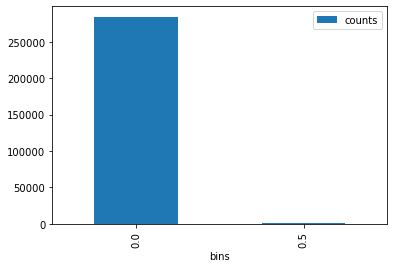

In [77]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
hist_CC.set_index('bins'
            ).plot(kind='bar')
plt.show()

Now lets look at column V1

In [78]:
#generate bins and count of each bin
histogram_V1 = (
    credit_card1
    .select('V1')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [79]:
#.histogram() generates two arrays: 
#1) list of bin bounds, 
#2) count of elements in corresponding bin
for i in histogram_V1:
    print(i)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[-56.407509631329, -44.63502170682096, -32.862533782312916, -21.090045857804874, -9.317557933296833, 2.45492999121121]
[2, 21, 111, 1073, 283600]

We notice that there are fewer records with a greater negative normalized values which we conclude correlate to fraudulent transactions, there are 2 records with a V1 value of -56.41, 21 records with a V1 value of -44.64, 111 records at -32.86 and so on. below we round these values to 2 decimal points for clarity.

In [80]:
#display bin ranges
for i in range(len(histogram_V1[0])-1):
    print('[' + str(round(histogram_V1[0][i],2))
        + ',' + str(round(histogram_V1[0][i+1],2))
          + ')'
         )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[-56.41,-44.64)
[-44.64,-32.86)
[-32.86,-21.09)
[-21.09,-9.32)
[-9.32,2.45)

These are the V1 values normalized through PCA that correspond to our dependent variable "Class".

In [81]:
#symbol * unpacks histogram_V1 and passes the two compoonents to zip as parameters
#zip(*histogram_V1) = zip(histogram_V1[0], histogram_V1[1])
sorted(zip(*histogram_V1))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[(-56.407509631329, 2), (-44.63502170682096, 21), (-32.862533782312916, 111), (-21.090045857804874, 1073), (-9.317557933296833, 283600)]

This is another way to look at those values with their corresponding records. We see that the smaller the negative V1 value corresponds to the non-fraudulent credit card transactions. A visualization is provided below in the form of a histogram showing our analysis.

In [82]:
%%spark -o hist_V1 
#The above Spark magic exports hist_CC to local node running the notebook
#So that we can use the local object to draw a histogram
import pandas as pd
hist_V1 =  spark.createDataFrame(
    list(zip(*histogram_V1)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

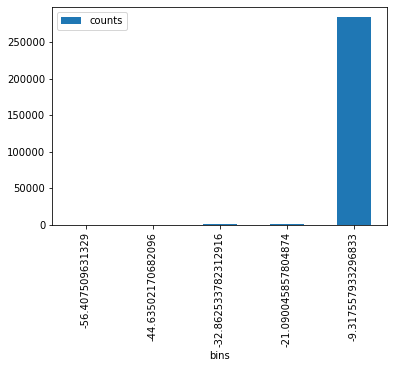

In [83]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
hist_V1.set_index('bins'
            ).plot(kind='bar')
plt.show()

We can continue this process of code for every single column. We have 28 more columns to analyze but will not show code for every column here in this notebook. 

# Visualizing interactions between features

First we look at the correlation and interaction between the column V1 and V20 with a sample of 2500 by default

In [84]:
%%spark -o scatter
#spark magic moves dataframe to local
#By default it gets a sample of 2500 but you can change it
scatter = (
    credit_card1
    .select('V1', 'V20')
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

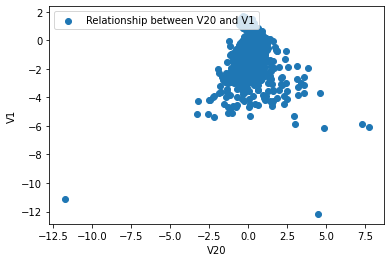

In [85]:
%matplotlib inline

plt.scatter( list(scatter['V20'])
         , list(scatter['V1']), 
            label="Relationship between V20 and V1")
plt.xlabel("V20")
plt.ylabel("V1")
plt.legend(loc='upper left')
plt.show()

We see that there is a strong positive correlation between V1 and V20 with outliers at around (-12,-11), (-4.8, -12), (-7.5, -6), and so on. We focus on those that are on the outskirts of the dataset interaction.

Next, we look at the correlation and interaction between the column V2 and Class with a sample of 2500 by default

In [86]:
%%spark -o scatter
#spark magic moves dataframe to local
#By default it gets a sample of 2500 but you can change it
scatter = (
    credit_card1
    .select('V2', 'Class')
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

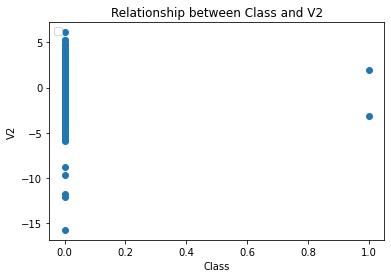

In [87]:
%matplotlib inline

plt.scatter( list(scatter['Class'])
         , list(scatter['V2']))
plt.title("Relationship between Class and V2")
plt.xlabel("Class")
plt.ylabel("V2")
plt.legend(loc='upper left')
plt.show()

We see that there is a correlation between V2 and Class. We focus on those that are on the 1.0 of the dataset interaction at Class. Here we see few fraudulent credit card transactions at a V2 value of approximately -3 and 3, we analyze that fraudulent transactions here can take on a negative or positive value.

Next, we look at the correlation and interaction between the column V7 and Class with a sample of 2500 by default

In [88]:
%%spark -o scatter
#spark magic moves dataframe to local
#By default it gets a sample of 2500 but you can change it
scatter = (
    credit_card1
    .select('V7', 'Class')
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

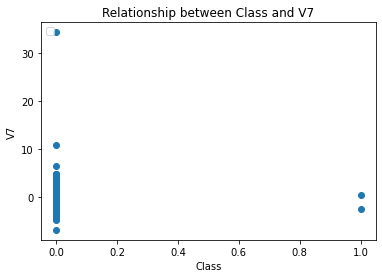

In [89]:
%matplotlib inline

plt.scatter( list(scatter['Class'])
         , list(scatter['V7']))
plt.title("Relationship between Class and V7")
plt.xlabel("Class")
plt.ylabel("V7")
plt.legend(loc='upper left')
plt.show()

We see that there is a correlation between V7 and Class. We focus on those that are on the 1.0 of the dataset interaction at Class. Here we see few fraudulent credit card transactions at a V7 value of approximately -4 and 0.2, very low values represent our fraudulent transactions.

Lastly, we look at the correlation and interaction between the column Class and V20 with a sample of 2500 by default

In [90]:
%%spark -o scatter
#spark magic moves dataframe to local
#By default we get a sample of 2500, this can always be changed
scatter = (
    credit_card1
    .select('V20', 'Class')
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

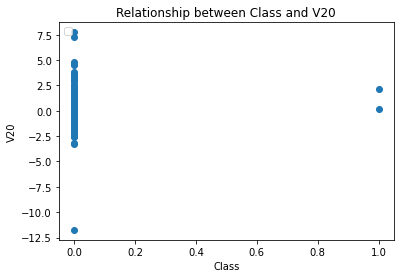

In [91]:
%matplotlib inline

plt.scatter( list(scatter['Class'])
         , list(scatter['V20']))
plt.title("Relationship between Class and V20")
plt.xlabel("Class")
plt.ylabel("V20")
plt.legend(loc='upper left')
plt.show()

We see that there is a correlation between V20 and Class. We focus on those that are on the 1.0 of the dataset interaction at Class. Here we see few fraudulent credit card transactions at a V20 value of about 0 and 2.2 

# <h1><center>**Classification Modeling**<center></h1>

# Correlations and their Interpretations 
We look at correlation analysis here in this section.

In [92]:
#install S3 package needed for saving correlation output to S3
sc.install_pypi_package('S3Fs')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/a7/58/732ea1c735d725b1cc4cf365ae6326c22569a5e88c8502d13844e91f08ef/s3fs-0.5.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/25/a81b015035012131056a6b7a339eec052f86f33e35fd91f160e961ea2a5e/aiobotocore-1.1.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a5/8b/1df260f860f17cb08698170153ef7db672c497c1840dcc8613ce26a8a005/fsspec-0.8.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/97/e7/af7219a0fe240e8ef6bb555341a63c43045c21ab0392b4435e754b716fa1/yarl-1.6.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e1/1e/5a4441be21b0726c4464f3f23c8b19628372f606755a9d2e46c187e65ec4/async_timeout-3.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/da/e6/50c7f52781f45c2b37c77e96

In [93]:
%%spark -o corr
import pyspark.ml.stat as st
import numpy as np
import pandas as pd


#create a vector assembler for all columns in credit_card1 dataset
#with an output column named "feautures", the default name used in PySpark
features_and_label = feat.VectorAssembler(
    inputCols=credit_card1.columns
    , outputCol='features'
)


#using the statistical test named pearson we are able to calculate correlations
corr = st.Correlation.corr(
    features_and_label.transform(credit_card1), 
    'features', 
    'pearson'
)

print(str(corr.collect()[0][0]))
corr_pd = corr.toPandas()
output_np = np.array(corr_pd.iloc[0, 0].values).reshape(
    (corr_pd.iloc[0, 0].numRows, corr_pd.iloc[0, 0].numCols))



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

name 'feat' is not defined
Traceback (most recent call last):
NameError: name 'feat' is not defined



This correlation matrix shows us the result of how the variables correlate and depend on eachother. We see the correlations of the 29 variable we are analyzing.

In [94]:
%%local
import numpy as np
import pandas as pd
output_np = np.array(corr.iloc[0, 0]['values']).reshape(
    (corr.iloc[0, 0]['numRows'], corr.iloc[0, 0]['numCols']))

#Change the following path to a path in your own JupyterLab
pd.DataFrame(output_np).to_csv('corr.csv')

NameError: name 'corr' is not defined

In [ ]:
#print the 10 selected features for model selection
num_of_features = 10
cols = dict([
    (i, e) 
    for i, e 
    in enumerate(credit_card1.columns)
])

corr_matrix = corr.collect()[0][0]
label_corr_with_idx = [
    (i[0], e) 
    for i, e 
    in np.ndenumerate(corr_matrix.toArray()[:,0])
][1:]

label_corr_with_idx_sorted = sorted(
    label_corr_with_idx
    , key=lambda el: -abs(el[1])
)

features_selected = np.array([
    cols[el[0]] 
    for el 
    in label_corr_with_idx_sorted
])[0:num_of_features]

features_selected

The 10 features_selected from our correlation analysis are 'Amount', 'Class', 'V7', 'V28', 'V14', 'V16', 'V9', 'V5', 'V20', and 'V3', these are selected using a lambda function. These features will be used for our model selection.

**Now we will drop all other independent variables that are not part of our feauture_selection so we can optimize our model performance.**

Below is a printSchema of our current dataframe credit_card1 with all variables except "Time", all these variable will lead to a overfitted model so we will only keep features_selected shown in the above output.

In [ ]:
credit_card1.printSchema()

In [ ]:
credit_card1 = credit_card1.drop(*['V1', 'V2', 'V4','V6','V8','V10','V11','V12','V13','V15','V17','V18','V19','V21','V22','V23','V24','V25','V26','V27'])

In [ ]:
credit_card1.printSchema()

This is our model selection dataframe that was retrieved from our correlation analysis. These are the features we will be using for the below code and classification modeling.

# Data Transformation

The Credit Card Fraud Detection dataset does not need any data transformation. The independent variables V1 through  V28 are normalized through the use of Principle Component Analysis (PCA) dimensionality reduction to protect user identities and sensitive features. The dataset originally came this way, therefore does not need further data transformation to be performed. We recognize that the "Amount" feature is not transformed in any way, this is acceptable since we do not intend to change the transaction amount of each of the recorded credit card transactions in any way, this feature also does not need transformation. There is also not need to create dummies since our dependent variable is already binary, where:
- 1 = a fraudulent transaction
- 0 = a non-fraudulent transaction

# Modeling: Classification

In [ ]:
#examine all distinct values for dependent variable
credit_card1.select('Class').groupBy('Class').count().show()

Our new dataframe (credit_card2) for this classification model has a dependent variable "Class" with 492 fraudulent transactions and 284,315 non-fraudulent transactions.

## Build a pipeline for modeling

This pipeline will abstract distinct intermediate stages by automating the data flow through the workflow. This will make our code more readable as it will create a higher abstraction of the system, and will assist with our code debugging.

In [ ]:
from pyspark.ml import Pipeline
import pyspark.ml.regression as rg

#create a vector assembler for credit_card1 dataset for every column except for the first one
vectorAssembler = feat.VectorAssembler(
    inputCols=credit_card1.columns[0:-1]
    , outputCol='features')

#Generalized Linear model (GLM) allows for running regression 
#on non-normal data. identity link function is used when we don't need to
#transform dependent varaible. Other link functions, such as log or logit,
#transform the dependent variable
lr_obj = rg.GeneralizedLinearRegression(
    labelCol='Class'
    , maxIter=10
    , regParam=0.01
    , link='identity'
    , linkPredictionCol="p"
)

#create a pipeline of the 2 stages (vectorization, regression)
pip = Pipeline(stages=[vectorAssembler, lr_obj])

#run the pipeline
(
    pip
    .fit(credit_card1)
    .transform(credit_card1)
    .select('Class', 'prediction')
    .show(20)
)

In [ ]:
%%spark -o transformed_df -m sample -n 3000
#the above magic exports a random sample of 3000 records from transformed_df to local
#the default number of records is 2500

transformed_df = credit_card1.select('Class')

In [ ]:
#this is the pandas dataframe

transformed_df.count()

In [ ]:
%%local
#draw a histogram of Class using the pandas dataframe
transformed_df.hist()

## Logistic Regression and Random Forest

## Logistic Regression
- Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, however our dependent variable class is already binary as 1 = a fraudulent credit card transaction and 0= a non-fradulent credit card transaction.

In [ ]:
import pyspark.ml.classification as cl

#split into train and test sets with 70% train and 30% test
credit_card1_train, credit_card1_test = (
    credit_card1
    .randomSplit([0.7, 0.3], seed=666)
)

#convert all features to vector except for last column which is our dependent variable
vectorAssembler = feat.VectorAssembler(
    inputCols=credit_card1.columns[0:-1]
    , outputCol='features'
)


#create a binomial regression object
#dependent variable has 2 classes
logReg_obj = cl.LogisticRegression(
    labelCol='Class'
    , regParam=0.01
    , elasticNetParam=1.0
)

#create pipeline of 1)vector, and 2)logistic regression
pipeline = Pipeline(
    stages=[
        vectorAssembler
        , logReg_obj
    ])
#train the model
pModel = pipeline.fit(credit_card1_train)

In [ ]:
import pyspark.ml.evaluation as ev

#apply the model to test set
logReg_model = (
    pModel
    .transform(credit_card1_test)
)

results_logReg = logReg_model.select('Class', 'probability', 'prediction')

#evaluate performance of the binomial model (2 classes)
evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Class')

(
    #F-1 score
    evaluator.evaluate(results_logReg)
    #weighted precision
    , evaluator.evaluate(
        results_logReg
        , {evaluator.metricName: 'weightedPrecision'}
    ) 
    #accuracy
    , evaluator.evaluate(
        results_logReg
        , {evaluator.metricName: 'accuracy'}
    )
)

We see that our 'Class' or F1 score is 99.74%, our 'probablility' of belonging to the actual class is 99.80% for wieghted precision, and our 'prediction' or accuracy score is 99.82%. these scores are very high therefore our model for logistic regression shows to be precise and accurate for our predictions, yet we awknowledge overfitting and recognize this model is very unbalanced. 

In [ ]:
#print model coefficients
#for our binomial model we use coefficients instead of coefficientMatrix
print(pModel.stages[-1].coefficients.toArray())

In [ ]:
credit_card1.printSchema()

We see 1 model for our binomial classes of our dependent variable "Class", we analyze that here our variable V14 has a weight value of -0.41 and is the only variable with a value for weight in the model.

## Random Forest Classifier
Here on our random forest classifier analysis we are using 10 trees which each use different features to create multiple models. When it comes to prediction here we let the 10 trees help as we use the majority vote. For each tree we get a different sample of records that chooses different features, each get a subset to get different trees.

In [ ]:
#Use Random Forest Classifier to get 10 trees with 10 minimum instances per node
#this will restrict or limit the splits or growth of the tree to avaod overfitting
rf_obj = cl.RandomForestClassifier(
    labelCol='Class'
    , minInstancesPerNode=10
    , numTrees=10
)

#Create the pipeline of the vector assembler
pipeline = Pipeline(
    stages=[vectorAssembler, rf_obj]
)

#fit the training set
pModel = pipeline.fit(credit_card1_train)

#apply this to the test set
rf_obj_trained = (
    pModel
    .transform(credit_card1_test)
)

#Get the probability and prediction
results_rf = rf_obj_trained.select('Class', 'probability', 'prediction')

#Apply MulticlassClassificationEvaluator to get the F1 score, weighted precision, and accuracy scores
evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Class')

(
    evaluator.evaluate(results_rf)
    , evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'weightedPrecision'}
    )
    , evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'accuracy'}
    )
)

We see that our 'Class' or F1 score is 99.90%, our 'probablility' of belonging to the actual class is 99.90% for wieghted precision, and our 'prediction' or accuracy score is 99.91%. These scores are better than those we got for logistic regression therefore the random forest classifier is more accurate for our model as we are seeing an improvement in all scores. Again we recognize an overfitted model. 

###  Random Forest regression

In [ ]:
vectorAssembler = feat.VectorAssembler(
    inputCols=credit_card1.columns[0:-1]
    , outputCol='features')

#minInfoGain: min decrease in impurity to split
rf_obj = rg.RandomForestRegressor(
    labelCol='Class'
    , maxDepth=10
    , minInstancesPerNode=10
    , minInfoGain=0.1
    , numTrees=10
)

pip = Pipeline(stages=[vectorAssembler, rf_obj])

results = (
    pip
    .fit(credit_card1_train)
    .transform(credit_card1_test)
    .select('Class', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='Class')
evaluator.evaluate(results, {evaluator.metricName: 'r2'})

With our results, we can determine that we have too many predictors, nine predictors, and a simpler model would be desired; however, as mentioned our model is quite poor and there appears to be no predictive value from this model with an R2 score of -1.32

## Gradient Boosted Trees

The Gradient Boosted Regression Trees (GBRT) model (also called Gradient Boosted Machine or GBM) is one of the most effective machine learning models for predictive analytics, making it an industrial workhorse for machine learning.

In [ ]:
gbt_obj = rg.GBTRegressor(
    labelCol='Class'
    , minInstancesPerNode=10
    , minInfoGain=0.1
)

pip = Pipeline(stages=[vectorAssembler, gbt_obj])

results = (
    pip
    .fit(credit_card1_train)
    .transform(credit_card1_test)
    .select('Class', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='Class')
evaluator.evaluate(results, {evaluator.metricName: 'r2'})

R2, the coefficient of multiple determination, is defined as SS(reg)/SS(total) or, equivalently, 1 - (SSE/SSTO). R2 measures the proportionate reduction in variation of Y, associated with the set of X predictors. R2 will be inflated as more X variables are added. With our results, we can determine that we have too many predictors (x variables), nine total, and a simpler model would be desired; however, as mentioned our model is quite poor and there appears to be no predictive value from this model, despite our feature_selection using correlation analysis, with an R2 score of -4.90

##  Tune hyperparameters (regParam, elasticNetParam, ChiSqSelector.numTopFeatures) 

This data set does not have any categorical data, therefore we will not be using ChiSqSelector.numTopFeatures to tune hyperparameters. We will only be using regParam and elasticNetParam for tuning hyperparameters since all our dataset features are all numerical. 

In [ ]:
import pyspark.ml.tuning as tune

vectorAssembler = feat.VectorAssembler(
    inputCols=credit_card1.columns[0:-1]
    , outputCol='features')


logReg_obj = cl.LogisticRegression(
    labelCol='Class'
)

[0, 0.25, 0.5, .75, 1]
[0.5, .6, .7, .8, .9, 1]
[.5, .54, .58, .62, .66, .7]
#use ParamGridBuilder to build a grid of parameters
logReg_grid = (
    tune.ParamGridBuilder()
    #try 2 values for regParam
    .addGrid(logReg_obj.regParam
            , [0.01, 0.1]
        )
    #try 2 values for elasticNetParam
    .addGrid(logReg_obj.elasticNetParam
            , [1.0, 0.5]
        )
    .build()
)

logReg_ev = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Class')

# use K-fold cross validation for grid search
# CrossValidator binds all of these together
# default value is k=3
cross_v = tune.CrossValidator(
    estimator=logReg_obj
    , estimatorParamMaps=logReg_grid
    , evaluator=logReg_ev
)

pipeline = Pipeline(stages=[vectorAssembler])
data_trans = pipeline.fit(credit_card1_train)

logReg_modelTest = cross_v.fit(
    data_trans.transform(credit_card1_train)
)

In [ ]:
# measure performance of best model
data_trans_test = data_trans.transform(credit_card1_test)
results = logReg_modelTest.transform(data_trans_test)

print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedPrecision'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedRecall'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'accuracy'}))
print('Best params, regParam: %s, elasticNetParam: %s' 
      %(logReg_modelTest.bestModel._java_obj.getRegParam(),
      logReg_modelTest.bestModel._java_obj.getElasticNetParam()))

Our classification prediction model shows very high scores for weighted precision, weighted recall, and accuracy at values of 99.82%, 99.83%, and 99.83%.

- Weighted precision ,used by Spark ML ,is computed using precision of both the classes and then adding using weight of each class label in test 
- Weighted recall is the percent of correctly labeled elements of a certain class. Weighted is the arithmetic mean of recall for each class, weighted by number of true instances in each class
- Accuracy is the set of labels predicted for a sample, must exactly match the corresponding set of labels in y_true

The model can be improved by simplifying the x variables and either under or over-sampling the dataset, this can be found below.

In [ ]:
#get coefficients for the best model
logReg_modelTest.bestModel.coefficients.toArray()

In [ ]:
credit_card1.printSchema()

The coefficients to the model for V3 = -0.03, V5 = 0, V7 = -0.03, V9 = 0, V14 = -0.50, V16 = -0.01, V20 = 0, V28 = 0, and Amount = 0

### Train-validation splitting
Instead of using k-fold cross validation, we use a train-validation split approach.

In [ ]:
train_v = tune.TrainValidationSplit(
    estimator=logReg_obj
    , estimatorParamMaps=logReg_grid
    , evaluator=logReg_ev
    #, parallelism=4
)

logReg_modelTrainV = (
    train_v
    .fit(data_trans.transform(credit_card1_train)))

results = logReg_modelTrainV.transform(data_trans_test)

print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedPrecision'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedRecall'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'accuracy'}))
print('Best params, regParam: %s, elasticNetParam: %s' 
      %(logReg_modelTrainV.bestModel._java_obj.getRegParam(),
      logReg_modelTrainV.bestModel._java_obj.getElasticNetParam()))

Our classification prediction model shows very high scores for weighted precision, weighted recall, and accuracy at values of 99.82%, 99.83%, and 99.83%. The best params for regParam are 0.01 and 0.5 for elasticNetParam

- Weighted precision ,used by Spark ML ,is computed using precision of both the classes and then adding using weight of each class label in test 
- Weighted recall is the percent of correctly labeled elements of a certain class. Weighted is the arithmetic mean of recall for each class, weighted by number of true instances in each class
- Accuracy is the set of labels predicted for a sample, must exactly match the corresponding set of labels in y_true
- regParam is used for L2 regularization, which reduces the chance of overfitting by penalizing models for being too complex
- elasticNetParam is a regularization function

The model can be improved by simplifying the x variables and either under or over sampling the dataset, this can be found below.

In [ ]:
#print model coefficients
#for a binomial model use coefficients instead of coefficientMatrix
logReg_modelTrainV.bestModel.coefficients.toArray()

The coefficients to the model for V3 = -0.03, V5 = 0, V7 = -0.03, V9 = 0, V14 = -0.50, V16 = -0.01, V20 = 0, V28 = 0, and Amount = 0

We noticed a overfitting of our model due to such a large dataset that has very few recorded fraudulent credit card transactions versus non-fraudulent credit card transactions. We have decided to analyze the model using both **over-sampling** and **under-sampling** in an effort to improve the overall model.

# Playing with Over-sampling

In [ ]:
import pyspark.sql.functions as f
import pyspark.ml.feature as feat
import numpy as np
from pyspark.ml import Pipeline
import pyspark.ml.classification as cl
import pyspark.ml.regression as rg
import pyspark.ml.evaluation as ev
from pyspark.sql.functions import col, explode, array, lit

In [ ]:
# select witch column 
credit_card1_over = credit_card1.filter(credit_card1['Class'] == 0)
credit_card1_under = credit_card1.filter(credit_card1['Class'] == 1)

# take the ratio
over_count = credit_card1_over.count()
under_count = credit_card1_under.count() 
ratio = over_count / under_count

#complete the oversampling
credit_card1_ovesampled = credit_card1_under.sample(withReplacement=True, fraction=ratio, seed=1)
credit_card_oversample = credit_card1_over.unionAll(credit_card1_ovesampled)

In [ ]:
credit_card_oversample.head()

In [ ]:
credit_card_oversample.count()

### Logistic Regression with Over-sample

In [ ]:
import pyspark.ml.classification as cl

#split into train and test sets with 70% train and 30% test
credit_card_over_train, credit_card_over_test = (
    credit_card_oversample
    .randomSplit([0.7, 0.3], seed=666)
)

#convert all features to vector except for last column which is our dependent variable
vectorAssembler = feat.VectorAssembler(
    inputCols=credit_card_oversample.columns[0:-1]
    , outputCol='features'
)


#create a binomial regression object
#dependent variable has 2 classes
logReg_obj = cl.LogisticRegression(
    labelCol='Class'
    , regParam=0.01
    , elasticNetParam=1.0
)

#create pipeline of 1)vector, and 2)logistic regression
pipeline = Pipeline(
    stages=[
        vectorAssembler
        , logReg_obj
    ])
#train the model
pModel = pipeline.fit(credit_card_over_train)

In [ ]:
import pyspark.ml.evaluation as ev

#apply the model to test set
logReg_model = (
    pModel
    .transform(credit_card_over_test)
)

results_logReg = logReg_model.select('Class', 'probability', 'prediction')

#evaluate performance of the binomial model (2 classes)
evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Class')

(
    #F-1 score
    evaluator.evaluate(results_logReg)
    #weighted precision
    , evaluator.evaluate(
        results_logReg
        , {evaluator.metricName: 'weightedPrecision'}
    ) 
    #accuracy
    , evaluator.evaluate(
        results_logReg
        , {evaluator.metricName: 'accuracy'}
    )
)

We see that our 'Class' or F1 score is 92.40%, our 'probablility' of belonging to the actual class is 93.04% for wieghted precision, and our 'prediction' or accuracy score is 92.43%. These scores are more realistic and better fitted than our original model. 

## Random Forest Classifier with Over-sample
Here on our random forest classifier analysis we are using 10 trees which each use different features to create multiple models. When it comes to prediction here we let the 10 trees help as we use the majority vote. For each tree we get a different sample of records that chooses different features, each get a subset to get different trees.

In [ ]:
#Use Random Forest Classifier to get 10 trees with 10 minimum instances per node
#this will restrict or limit the splits or growth of the tree to avaod overfitting
rf_obj = cl.RandomForestClassifier(
    labelCol='Class'
    , minInstancesPerNode=10
    , numTrees=10
)

#Create the pipeline of the vector assembler
pipeline = Pipeline(
    stages=[vectorAssembler, rf_obj]
)

#fit the training set
pModel = pipeline.fit(credit_card_over_train)

#apply this to the test set
rf_obj_trained = (
    pModel
    .transform(credit_card_over_test)
)

#Get the probability and prediction
results_rf = rf_obj_trained.select('Class', 'probability', 'prediction')

#Apply MulticlassClassificationEvaluator to get the F1 score, weighted precision, and accuracy scores
evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Class')

(
    evaluator.evaluate(results_rf)
    , evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'weightedPrecision'}
    )
    , evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'accuracy'}
    )
)

We see that our 'Class' or F1 score is 93.68%, our 'probablility' of belonging to the actual class is 94.10% for wieghted precision, and our 'prediction' or accuracy score is 93.70%. These scores are better than those we got for logistic regression therefore the random forest classifier is more accurate for our model as we are seeing an improvement in all scores. 

###  Random Forest Regression with Over-sample

In [ ]:
vectorAssembler = feat.VectorAssembler(
    inputCols=credit_card_oversample.columns[0:-1]
    , outputCol='features')

#minInfoGain: min decrease in impurity to split
rf_obj = rg.RandomForestRegressor(
    labelCol='Class'
    , maxDepth=10
    , minInstancesPerNode=10
    , minInfoGain=0.1
    , numTrees=10
)

pip = Pipeline(stages=[vectorAssembler, rf_obj])

results = (
    pip
    .fit(credit_card_over_train)
    .transform(credit_card_over_test)
    .select('Class', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='Class')
evaluator.evaluate(results, {evaluator.metricName: 'r2'})

The over-sampled model is much more useful for our classification of fraudulent credit card transactions, we see a 60.74% for our R2 score, much better than our original model

## Gradient Boosted Trees

In [ ]:
gbt_obj = rg.GBTRegressor(
    labelCol='Class'
    , minInstancesPerNode=10
    , minInfoGain=0.1
)

pip = Pipeline(stages=[vectorAssembler, gbt_obj])

results = (
    pip
    .fit(credit_card_over_train)
    .transform(credit_card_over_test)
    .select('Class', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='Class')
evaluator.evaluate(results, {evaluator.metricName: 'r2'})

R2, the coefficient of multiple determination, is defined as SS(reg)/SS(total) or, equivalently, 1 - (SSE/SSTO). R2 measures the proportionate reduction in variation of Y, associated with the set of X predictors. Our R2 score is better than the original model, therfore over-sampling has improved our classification model with a score of 71.29%

##  Tune Hyperparameters (regParam, elasticNetParam, ChiSqSelector.numTopFeatures)  Over-sample

This data set does not have any categorical data, therefore we will not be using ChiSqSelector.numTopFeatures to tune hyperparameters. We will only be using regParam and elasticNetParam for tuning hyperparameters since all our dataset features are all numerical. 

In [ ]:
import pyspark.ml.tuning as tune

vectorAssembler = feat.VectorAssembler(
    inputCols=credit_card_oversample.columns[0:-1]
    , outputCol='features')


logReg_obj = cl.LogisticRegression(
    labelCol='Class'
)

[0, 0.25, 0.5, .75, 1]
[0.5, .6, .7, .8, .9, 1]
[.5, .54, .58, .62, .66, .7]
#use ParamGridBuilder to build a grid of parameters
logReg_grid = (
    tune.ParamGridBuilder()
    #try 2 values for regParam
    .addGrid(logReg_obj.regParam
            , [0.01, 0.1]
        )
    #try 2 values for elasticNetParam
    .addGrid(logReg_obj.elasticNetParam
            , [1.0, 0.5]
        )
    .build()
)

logReg_ev = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Class')

# use K-fold cross validation for grid search
# CrossValidator binds all of these together
# default value is k=3
cross_v = tune.CrossValidator(
    estimator=logReg_obj
    , estimatorParamMaps=logReg_grid
    , evaluator=logReg_ev
)

pipeline = Pipeline(stages=[vectorAssembler])
data_trans = pipeline.fit(credit_card_over_train)

logReg_modelTest = cross_v.fit(
    data_trans.transform(credit_card_over_train)
)

In [ ]:
# measure performance of best model
data_trans_test = data_trans.transform(credit_card_over_test)
results = logReg_modelTest.transform(data_trans_test)

print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedPrecision'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedRecall'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'accuracy'}))
print('Best params, regParam: %s, elasticNetParam: %s' 
      %(logReg_modelTest.bestModel._java_obj.getRegParam(),
      logReg_modelTest.bestModel._java_obj.getElasticNetParam()))

Our over-sampled classification prediction model shows improved scores for weighted precision, weighted recall, and accuracy at values of 93.04%, 92.43%, and 92.43%.

- Weighted precision ,used by Spark ML ,is computed using precision of both the classes and then adding using weight of each class label in test 
- Weighted recall is the percent of correctly labeled elements of a certain class. Weighted is the arithmetic mean of recall for each class, weighted by number of true instances in each class
- Accuracy is the set of labels predicted for a sample, must exactly match the corresponding set of labels in y_true

The model has been improved.

In [ ]:
#get coefficients for the best model
logReg_modelTest.bestModel.coefficients.toArray()

In [ ]:
credit_card1.printSchema()

The above coeffiecients correspond to the credit_card1 schema variables in the provided order.

### Train-validation Splitting
Instead of using k-fold cross validation, we use a train-validation split approach.

In [ ]:
train_v = tune.TrainValidationSplit(
    estimator=logReg_obj
    , estimatorParamMaps=logReg_grid
    , evaluator=logReg_ev
    #, parallelism=4
)

logReg_modelTrainV = (
    train_v
    .fit(data_trans.transform(credit_card_over_train)))

results = logReg_modelTrainV.transform(data_trans_test)

print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedPrecision'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedRecall'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'accuracy'}))
print('Best params, regParam: %s, elasticNetParam: %s' 
      %(logReg_modelTrainV.bestModel._java_obj.getRegParam(),
      logReg_modelTrainV.bestModel._java_obj.getElasticNetParam()))

Our over-sampled classification prediction model shows improved scores for weighted precision, weighted recall, and accuracy at values of 93.04%, 92.43%, and 92.43%.

- Weighted precision ,used by Spark ML ,is computed using precision of both the classes and then adding using weight of each class label in test 
- Weighted recall is the percent of correctly labeled elements of a certain class. Weighted is the arithmetic mean of recall for each class, weighted by number of true instances in each class
- Accuracy is the set of labels predicted for a sample, must exactly match the corresponding set of labels in y_true

The model has been improved.

In [ ]:
#print model coefficients
#for a binomial model use coefficients instead of coefficientMatrix
logReg_modelTrainV.bestModel.coefficients.toArray()

The above coeffiecients correspond to the credit_card1 schema variables in the provided order.

# Playing with Under-sample

In [ ]:
# getting ratio for under sampling
major_df = credit_card1.filter(col("Class") == 0)
minor_df = credit_card1.filter(col("Class") == 1)
ratio = float(major_df.count()/minor_df.count())
print(ratio)

A sample of approximately 577 is used in under-sampling

In [ ]:
# creating a under sampling 
sampled_majority_df = major_df.sample(False, 1/ratio)
credit_cardunder = sampled_majority_df.unionAll(minor_df)
credit_cardunder.head(5)
credit_cardunder.count()

In the dataset, there is such a huge difference in the number of fraudulent and non-fraudulent records, so creating a way to balance that would create results that would be more realistic. One method that will give us a better balanced dataset would be under-sampling. This method removes samples form the majority class to create a more balanced data, but it can remove useful information.


## Logistic Regression Under-sample

In [ ]:
#split into train and test sets
credit_cardunder_train, credit_cardunder_test = (
    credit_cardunder
    .randomSplit([0.7, 0.3], seed=666)
)

#convert all features ti vector except for last column
vectorAssembler = feat.VectorAssembler(
    inputCols=credit_cardunder.columns[0:-1]
    , outputCol='features'
)

#select top 10 predictors
selector = feat.ChiSqSelector(
    labelCol='Class'
    , numTopFeatures=10
    , outputCol='selected'
)

#create a binomial regression object
#DV has 2 classes
logReg_obj = cl.LogisticRegression(
    labelCol='Class'
    , featuresCol=selector.getOutputCol()
    , regParam=0.01
    , elasticNetParam=1.0
    , 
)

#create pipeline of 1)vector, 2)chisquare selector, 3)logistic regression
pipeline = Pipeline(
    stages=[
        vectorAssembler
        , selector
        , logReg_obj
    ])
#train the model
pModel = pipeline.fit(credit_cardunder_train)

In [ ]:
import pyspark.ml.evaluation as ev

#apply the model to test set
logReg_model = (
    pModel
    .transform(credit_cardunder)
)

results_logReg = logReg_model.select('Class', 'probability', 'prediction')

#evaluate performance of the multinomial model (7 classes)
evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Class')

(
    #F-1 score
    evaluator.evaluate(results_logReg)
    #weighted precision
    , evaluator.evaluate(
        results_logReg
        , {evaluator.metricName: 'weightedPrecision'}
    ) 
    #accuracy
    , evaluator.evaluate(
        results_logReg
        , {evaluator.metricName: 'accuracy'}
    )
)

We see that our 'Class' or F1 score is 92.76%, our 'probablility' of belonging to the actual class is 93.32% for weighted precision, and our 'prediction' or accuracy score is 92.80%. these scores are more realistic and  also better fitted than our original model. 

### Random Forest Classifier Under-sample

In [ ]:
#same as previous, this time using Random Forest
rf_obj = cl.RandomForestClassifier(
    labelCol='Class'
    , featuresCol=selector.getOutputCol()
    , minInstancesPerNode=10
    , numTrees=10
)

pipeline = Pipeline(
    stages=[vectorAssembler, selector, rf_obj]
)

pModel = pipeline.fit(credit_cardunder)

rf_obj_trained = (
    pModel
    .transform(credit_cardunder_test)
)
results_rf = rf_obj_trained.select('Class', 'probability', 'prediction')

evaluator = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Class')

(
    evaluator.evaluate(results_rf)
    , evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'weightedPrecision'}
    )
    , evaluator.evaluate(
        results_rf
        , {evaluator.metricName: 'accuracy'}
    )
)

We see that our 'Class' or F1 score is 92.71%, our 'probablility' of belonging to the actual class is 92.84% for wieghted precision, and our 'prediction' or accuracy score is 92.72%. These scores are better than those we got for logistic regression therefore the random forest classifier is more accurate for our model as we are seeing an improvement in all scores. 

###  Random Forest Regression with Under-sample

In [ ]:
vectorAssembler = feat.VectorAssembler(
    inputCols=credit_cardunder.columns[0:-1]
    , outputCol='features')

#minInfoGain: min decrease in impurity to split
rf_obj = rg.RandomForestRegressor(
    labelCol='Class'
    , maxDepth=10
    , minInstancesPerNode=10
    , minInfoGain=0.1
    , numTrees=10
)

pip = Pipeline(stages=[vectorAssembler, rf_obj])

results = (
    pip
    .fit(credit_cardunder_train)
    .transform(credit_cardunder_test)
    .select('Class', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='Class')
print('r2 : '  , evaluator.evaluate(results, {evaluator.metricName: 'r2'}))

The over-sampled model is much more useful for our classification of fraudulent credit card transactions, we see a 61.37% for our R2 score, much better than our original model

## Gradient Boosted Trees

In [ ]:
gbt_obj = rg.GBTRegressor(
    labelCol='Class'
    , minInstancesPerNode=10
    , minInfoGain=0.1
)

pip = Pipeline(stages=[vectorAssembler, gbt_obj])

results = (
    pip
    .fit(credit_cardunder_train)
    .transform(credit_cardunder_test)
    .select('Class', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='Class')
print('r2 : '  , evaluator.evaluate(results, {evaluator.metricName: 'r2'}))

R2, the coefficient of multiple determination, is defined as SS(reg)/SS(total) or, equivalently, 1 - (SSE/SSTO). R2 measures the proportionate reduction in variation of Y, associated with the set of X predictors. Our R2 score is better than the original model, therfore undersampling has improved our classification model with score of 70.91%

##  Tune Hyperparameters (regParam, elasticNetParam, ChiSqSelector.numTopFeatures)  Under-sample

This data set does not have any categorical data, therefore we will not be using ChiSqSelector.numTopFeatures to tune hyperparameters. We will only be using regParam and elasticNetParam for tuning hyperparameters since all our dataset features are all numerical. 

In [ ]:
import pyspark.ml.tuning as tune

vectorAssembler = feat.VectorAssembler(
    inputCols=credit_cardunder.columns[0:-1]
    , outputCol='features')


logReg_obj = cl.LogisticRegression(
    labelCol='Class'
)

[0, 0.25, 0.5, .75, 1]
[0.5, .6, .7, .8, .9, 1]
[.5, .54, .58, .62, .66, .7]
#use ParamGridBuilder to build a grid of parameters
logReg_grid = (
    tune.ParamGridBuilder()
    #try 2 values for regParam
    .addGrid(logReg_obj.regParam
            , [0.01, 0.1]
        )
    #try 2 values for elasticNetParam
    .addGrid(logReg_obj.elasticNetParam
            , [1.0, 0.5]
        )
    .build()
)

logReg_ev = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Class')

# use K-fold cross validation for grid search
# CrossValidator binds all of these together
# default value is k=3
cross_v = tune.CrossValidator(
    estimator=logReg_obj
    , estimatorParamMaps=logReg_grid
    , evaluator=logReg_ev
)

pipeline = Pipeline(stages=[vectorAssembler])
data_trans = pipeline.fit(credit_cardunder_train)

logReg_modelTest = cross_v.fit(
    data_trans.transform(credit_cardunder_train)
)

In [ ]:
# measure performance of best model
data_trans_test = data_trans.transform(credit_cardunder_test)
results = logReg_modelTest.transform(data_trans_test)

print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedPrecision'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedRecall'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'accuracy'}))
print('Best params, regParam: %s, elasticNetParam: %s' 
      %(logReg_modelTest.bestModel._java_obj.getRegParam(),
      logReg_modelTest.bestModel._java_obj.getElasticNetParam()))

Our under-sampled classification prediction model shows improved scores for weighted precision, weighted recall, and accuracy at values of 93.00%, 92.72%, and 92.72%.

- Weighted precision ,used by Spark ML ,is computed using precision of both the classes and then adding using weight of each class label in test 
- Weighted recall is the percent of correctly labeled elements of a certain class. Weighted is the arithmetic mean of recall for each class, weighted by number of true instances in each class
- Accuracy is the set of labels predicted for a sample, must exactly match the corresponding set of labels in y_true

The model has been improved.

In [ ]:
#get coefficients for the best model
logReg_modelTest.bestModel.coefficients.toArray()

In [ ]:
credit_card1.printSchema()

The above coeffiecients correspond to the credit_card1 schema variables in the provided order.

### Train-Validation Splitting
Instead of using k-fold cross validation, we use a train-validation split approach.

In [ ]:
train_v = tune.TrainValidationSplit(
    estimator=logReg_obj
    , estimatorParamMaps=logReg_grid
    , evaluator=logReg_ev
    #, parallelism=4
)

logReg_modelTrainV = (
    train_v
    .fit(data_trans.transform(credit_cardunder_train)))

results = logReg_modelTrainV.transform(data_trans_test)

print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedPrecision'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedRecall'}))
print(logReg_ev.evaluate(results, {logReg_ev.metricName: 'accuracy'}))
print('Best params, regParam: %s, elasticNetParam: %s' 
      %(logReg_modelTrainV.bestModel._java_obj.getRegParam(),
      logReg_modelTrainV.bestModel._java_obj.getElasticNetParam()))

Our under-sampled classification prediction model shows improved scores for weighted precision, weighted recall, and accuracy at values of 93.48%, 93.05%, and 93.05%.

- Weighted precision ,used by Spark ML ,is computed using precision of both the classes and then adding using weight of each class label in test 
- Weighted recall is the percent of correctly labeled elements of a certain class. Weighted is the arithmetic mean of recall for each class, weighted by number of true instances in each class
- Accuracy is the set of labels predicted for a sample, must exactly match the corresponding set of labels in y_true

The model has been improved.

In [ ]:
#get coefficients for the best model
logReg_modelTest.bestModel.coefficients.toArray()

In [ ]:
credit_card1.printSchema()

The above coeffiecients correspond to the credit_card1 schema variables in the provided order.

## The Results of Under-Sampling
- Comparing our results between Logistic Regression and Random Forest Classifier, There was not a significant difference between our f-1, precision, and accuracy scores.
- Random Forest Classifer had a lower f-1 score of.9271  , while logistic regression had a slightly better score of .9276.
- Logistic had a better score of precision(0.9332) and accuracy(0.9280), while Random Forest Classifer had a score of precision(0.9284) and accuracy(0.9272).

## Results of Under-sampling vs Over-sampling an Imbalaced Dataset.

- Looking at our results form our original dataset, under-sample, and over-sample, it’s clear that under-sample and over-sample gave more realistic results than our original unbalanced dataset. While our unbalanced dataset gave us results that were close to 100 percent, our over-sampling and under-sampling gave more realistic results that were in the lower 90 percent. 
- Comparing our results between Random Forest Classifier scores between both the over-sampled and under-sampled datasets, we analyzed differences between our f-1, precision, and accuracy scores.
- Our over-sampled Random Forest Classifier had a higher f-1 score of.9368 while our under-sampled Random Forest Classifier f-1 score was .9271
- Our Random Forest Classifier had a better scores for both over-sampled with precision (0.9410) and accuracy (0.9370), while Random Forest Classifier under-sampled had scores for precision (0.9284) and accuracy (0.9272).

Overall our findings and conclusion is that the over-sampling  gave better results than our under-sampling model, which can be the result of the under-sampling eliminating important features that can be used to get more accurate data.